In [26]:
import pandas as pd
import numpy as np

import datetime

from scipy import stats
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('sample.csv')
df.drop(columns=['Unnamed: 0', 'item', 'rating'], inplace=True)
df.sample(10)

,user,timestamp,total
34441,A2ME4L6KCEYALS,1347062400,420
135,A288G8UECOXFWK,1340236800,1142
339852,A3RNIDPPE77HGN,1369612800,181
5725,A2YBO8HKU4737O,1371427200,866
420613,AN456JW4ELMBE,1338595200,563
275769,A1UFMYBQXQB1G4,1315612800,37
316352,A24K3W507H3KQQ,1385510400,523
356731,A1A6MTAQB94U5C,1342051200,65
263493,A3NQT3W71JVM2B,1252713600,5
169000,A37EA8FLA56D33,1212969600,41


In [3]:
recency = df.groupby('user')['timestamp'].max()

In [4]:
frequency = df.groupby('user')['timestamp'].count()

In [5]:
monetary = df.groupby('user')['total'].sum()

In [6]:
rfm = pd.DataFrame({'recency':recency,'frequency':frequency, 'monetary':monetary})

In [7]:
rfm.sample(10)

,recency,frequency,monetary
user,,,
A3NS8SQFEL81AB,1343260800,1,367
AW4L00XFKWXZ8,1404000000,1,36
A19ZBT5OALJ8UK,1397952000,1,772
AJNLXR2MIQ5MY,1389139200,1,808
A1HSRD8FY1R72U,1358035200,1,180
A12YD532NT4KXV,1379116800,4,273
A2LYGZBC6H5TIE,1371600000,1,721
AVN3WZ6PE8TY2,1229299200,1,1221
A17KMA52IKHNYD,1376006400,1,37


In [8]:
rfm.shape

(339231, 3)

In [9]:
rfm['recency'] = pd.to_datetime(rfm['recency'], unit='s')
rfm.sample(10)

,recency,frequency,monetary
user,,,
A3478LO90CLJEN,2013-12-29,1,120
A1FLC9H8NH66YM,2013-10-04,7,5501
A1VVBZN99Q6V8D,2014-07-21,2,72
A17I2QRWJJ8VY9,2014-02-19,2,135
A3GBLU4F35HQ6X,2008-05-01,1,61
A197UAAWUBY6S0,2014-04-02,1,7
A3Q07ZIZTMU0Y8,2012-12-21,1,32
A1ICYNT58AV7PA,2009-08-23,1,130
AAKDFFFPY681S,2013-04-22,1,170


In [10]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339231 entries, A0002382258OFJJ2UYNTR to AZZZTAPYKI9RD
Data columns (total 3 columns):
recency      339231 non-null datetime64[ns]
frequency    339231 non-null int64
monetary     339231 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 10.4+ MB


In [11]:
today = datetime.datetime.strptime("2014-07-01","%Y-%m-%d")

rfm['recency'] = rfm['recency'].map(lambda x: (today-x).days)
rfm.sample(10)

,recency,frequency,monetary
user,,,
A3G4C3FSLJFJ76,298,1,152
A1Y8YBOO69YJTZ,1469,1,190
A2KMCD7A50FG50,551,1,67
A1Z4DVS8I4LLBM,335,1,207
A3DP91TJG89DN3,36,2,295
ABO4RNB5A8TBP,1114,1,606
A18TQ8GPVETHQ4,1490,1,272
A3UQMTHVFDKSP6,249,1,262
A2WENZ2CCZFBO7,316,1,1898


In [12]:
rfm.plot.scatter(x='recency', 
                y='frequency', 
                c='monetary',
                cmap='viridis_r', s=50)

In [21]:
rfm = rfm[rfm['recency']>0]
rfm = rfm[rfm['frequency']>0]
rfm = rfm[rfm['monetary']>0]

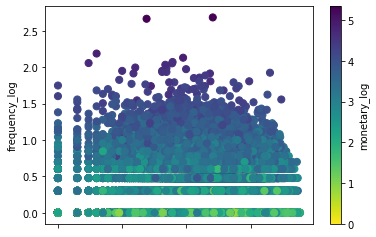

In [22]:
rfm['recency_log'] = np.log10(rfm['recency'])
rfm['frequency_log'] = np.log10(rfm['frequency'])
rfm['monetary_log'] = np.log10(rfm['monetary'])

rfm.plot.scatter(x='recency_log', 
                y='frequency_log', 
                c='monetary_log',
                cmap='viridis_r', s=50)

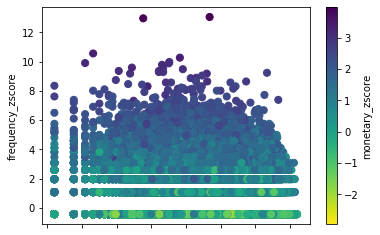

In [25]:
rfm['recency_zscore'] = stats.zscore(rfm['recency_log'])
rfm['frequency_zscore'] = stats.zscore(rfm['frequency_log'])
rfm['monetary_zscore'] = stats.zscore(rfm['monetary_log'])

rfm.plot.scatter(x='recency_zscore', 
                y='frequency_zscore', 
                c='monetary_zscore',
                cmap='viridis_r', s=50)

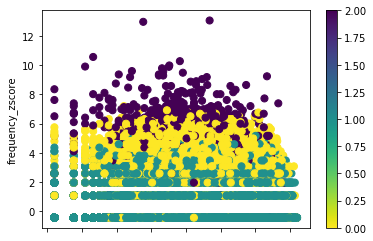

In [27]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm.values)

rfm.plot.scatter(x='recency_zscore', 
                y='frequency_zscore', 
                c=kmeans.labels_,
                cmap='viridis_r', 
                norm=None, s=50)

In [40]:
labels = pd.Series(kmeans.labels_.tolist())

In [42]:
labels.value_counts()

1    297482
0     30350
2      2021
dtype: int64

In [46]:
labels.index = rfm['recency'].index

In [53]:
df = pd.read_csv('sample.csv')

In [54]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.sample(10)

,user,item,rating,timestamp,total
305639,A3181MTXYWU8YE,B003AYC7ZE,4.0,1371340800,385
94404,A115MXP3EDABQ9,B0002ZO3G0,3.0,1282435200,22
425055,A31IHUU88DX9CA,B007R3PM9W,3.0,1363651200,2383
169596,A9LHUZ7SNCM49,B000PTF0E2,5.0,1310774400,91
359376,ASB5GEXFTE429,B004MF39YS,5.0,1356307200,77
79805,A20X4D99M0PBIK,B0002H0H0E,5.0,1206662400,13
93435,A2FJ9YDV03HTDD,B0002WSKEE,5.0,1397692800,226
78891,A3L0NW6835H9O4,B0002H0A3S,5.0,1385596800,210
226555,A1SZUPMDG6BFXX,B001EW5YQS,4.0,1338163200,238
353120,AODIXKMW8MGD2,B004GCOS9W,5.0,1389225600,688


In [56]:
df = df.set_index('user')
df.sample(10)

,item,rating,timestamp,total
user,,,,
A3NY4XJTR4JSAA,B00079PLRG,5.0,1390089600,230
A8Z2H8LL8MVSO,B000JM46FY,5.0,1292371200,187
A1LOKOYUKF7LX6,B000EB68VK,5.0,1356739200,157
A3JHQM2SDFQNEN,B001NYO15C,5.0,1367971200,720
A3PEFLP23GD1LQ,B007V7R2KG,5.0,1356912000,30
A35OUKBL3QTXP8,B0006B4ZR2,3.0,1384041600,25
A3F2ESFC9BF83E,B003TOS8EY,2.0,1286236800,242
A243Y9BDHDOC34,B004HJ201C,4.0,1392681600,61
A2K738RY3B24Y8,B007EDMEEG,5.0,1349049600,429


In [57]:
df['label'] = labels
df.sample(5)

,item,rating,timestamp,total,label
user,,,,,
A30XDXD4P24DL8,B000EAKZJ2,5.0,1400025600,40,1.0
A3UQTNF0CZWF87,B001AI8BJ8,5.0,1319760000,6,0.0
AZTT20GPHI4VZ,B00AZUAORE,5.0,1387497600,182,1.0
A1UW013BFJUTXJ,B00080MJ0G,3.0,1175299200,88,1.0
ARR0OS162J3JH,B000LDNLWU,4.0,1207180800,208,1.0


In [58]:
df = df[df['label'] == 2]
df.shape

(19415, 5)

In [59]:
df.head()

,item,rating,timestamp,total,label
user,,,,,
A2P1Z9NUJ9H1RT,0634055534,5.0,1367280000,282,2.0
A370T379VAAP4B,0739040251,4.0,1226448000,10500,2.0
A1ZMV5QSAR8V2L,0739040375,5.0,1380758400,238,2.0
A3DMR234MWQYSE,0739040375,5.0,1204848000,10500,2.0
A1WHGNU87BGJ2S,0739042726,4.0,1346371200,379,2.0


In [60]:
df.drop(columns=['total', 'timestamp', 'label']).to_csv('recommender.csv')